In [ ]:
import sklearn
from sklearn.datasets import make_circles

n_samples = 1000

x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
len(x), len(y)

(1000, 1000)

In [ ]:
print(f'First 5 samples of x :\n{x[:5]}')
print(f'First 5 samples of y :\n{y[:5]}')

First 5 samples of x :
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y :
[1 1 1 1 0]


In [ ]:
import pandas as pd
circles = pd.DataFrame({'x1': x[:, 0],
                        'x2' : x[:, 1],
                       'label' : y})
circles.head()

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


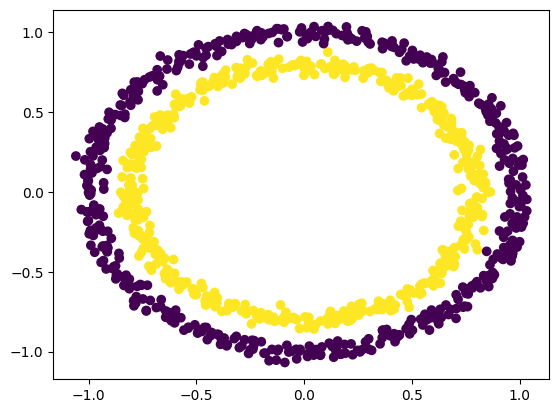

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y)

In [ ]:
import torch
from torch import nn

In [ ]:
type(x), x.dtype

(numpy.ndarray, dtype('float64'))

In [ ]:
x = torch.from_numpy(x).type(torch.float) # float is the same as float32 in torch
y = torch.from_numpy(y).type(torch.float)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
class classification(nn.Module):
    def __init__(self):
      super().__init__()
      self.layer1 = nn.Linear(in_features=2, out_features=5)
      self.layer2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
      return self.layer2(self.layer1(x)) # x -> layer1 -> layer2 -> output

model0 = classification().to(device)
model0

classification(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
device

'cuda'

In [ ]:
x_train.to(device)
y_train.to(device)
x_test.to(device)
y_test.to(device)

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.], device='cuda:0')

In [ ]:
# replicating the above model using nn.sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.1627,  0.3656],
                      [ 0.0249, -0.3959],
                      [ 0.3153,  0.2888],
                      [ 0.3817,  0.3549],
                      [-0.5187, -0.0144]], device='cuda:0')),
             ('layer1.bias',
              tensor([ 0.1692,  0.7034, -0.3318, -0.6603,  0.0458], device='cuda:0')),
             ('layer2.weight',
              tensor([[ 0.1615, -0.2378, -0.2074, -0.3807,  0.2459]], device='cuda:0')),
             ('layer2.bias', tensor([0.3853], device='cuda:0'))])

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5071, -0.4756],
                      [ 0.3504,  0.6077],
                      [-0.0191, -0.5943],
                      [ 0.2455, -0.5623],
                      [ 0.4136,  0.5312]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.3601,  0.5888,  0.4234, -0.3663, -0.1508], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.1107, -0.3524,  0.2373, -0.1515,  0.1628]], device='cuda:0')),
             ('1.bias', tensor([-0.1714], device='cuda:0'))])

In [ ]:
with torch.inference_mode():
  untrained_preds = model0(x_test.to(device))

In [ ]:
#loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through sigmoid activation before giving input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function builtin
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(x_test.to(device))[:5]
y_logits

tensor([[-0.3111],
        [-0.4367],
        [-0.0250],
        [-0.3919],
        [-0.0939]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4229],
        [0.3925],
        [0.4937],
        [0.4033],
        [0.4765]], device='cuda:0')

In [ ]:
y_preds = torch.round(y_pred_probs)

#logits -> pred probs -> pred labels
y_pred_labels = torch.round(torch.sigmoid(model_0(x_test.to(device))[:5]))
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 100

x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  y_logits = model_0(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():

    test_logits = model_0(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)

    test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)

  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | Loss: {loss:.5f}, Acc:{acc:.2f}%')

Epoch: 0 | Loss: 0.70387, Acc:43.75%
Epoch: 10 | Loss: 0.69876, Acc:46.00%
Epoch: 20 | Loss: 0.69635, Acc:47.50%
Epoch: 30 | Loss: 0.69507, Acc:47.38%
Epoch: 40 | Loss: 0.69435, Acc:48.12%
Epoch: 50 | Loss: 0.69390, Acc:48.12%
Epoch: 60 | Loss: 0.69361, Acc:47.75%
Epoch: 70 | Loss: 0.69342, Acc:49.00%
Epoch: 80 | Loss: 0.69329, Acc:49.50%
Epoch: 90 | Loss: 0.69321, Acc:50.12%


In [ ]:
import requests
from pathlib import Path

if Path('helper_function.py').is_file():
  print('helper_function.py already exists, skipping download')
else:
  print('Downloading helper_functions.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

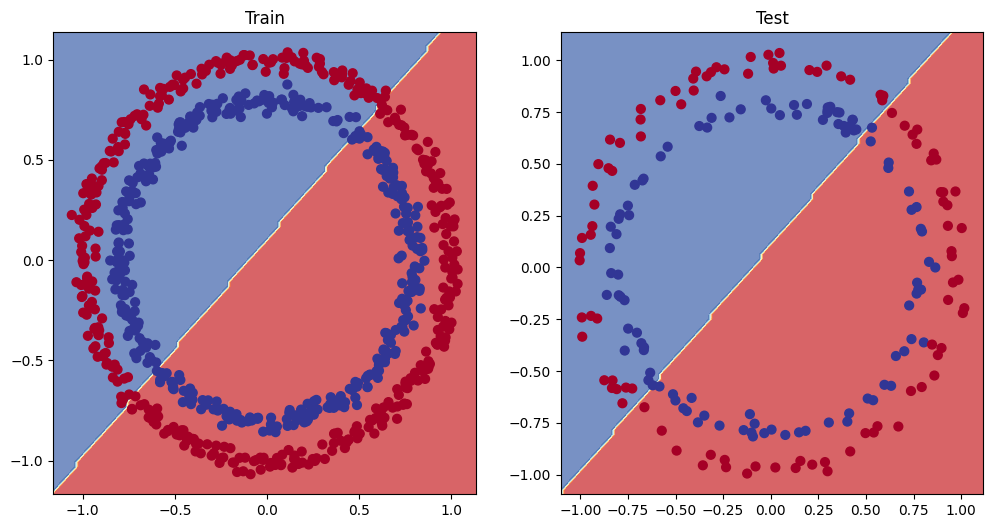

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_0, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_0, x_test, y_test)

In [ ]:
class classificationv1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x) #logits is represented by z
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x))) # This way of writing operations leverages speed ups where possible

model_1 = classificationv1().to(device)
model_1

classificationv1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn_v1 = nn.BCEWithLogitsLoss()
optimizer_v1 = torch.optim.SGD(params=model_1.parameters(),
                                lr=0.1)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs_v1 = 1000

x_train , y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs_v1):
  model_1.train()

  y_logits = model_1(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn_v1(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn_v1(test_logits,
                           y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  if epoch % 100 == 0:
    print(f'Epoch: {epoch} | Loss: {loss:5f}, Acc:{acc:.2f}% | Test Loss:{test_loss:.5f}, Test acc:{test_acc:.2f}%')

Epoch: 0 | Loss: 0.693955, Acc:50.88% | Test Loss:0.69261, Test acc:51.00%
Epoch: 100 | Loss: 0.693955, Acc:50.88% | Test Loss:0.69261, Test acc:51.00%
Epoch: 200 | Loss: 0.693955, Acc:50.88% | Test Loss:0.69261, Test acc:51.00%
Epoch: 300 | Loss: 0.693955, Acc:50.88% | Test Loss:0.69261, Test acc:51.00%
Epoch: 400 | Loss: 0.693955, Acc:50.88% | Test Loss:0.69261, Test acc:51.00%
Epoch: 500 | Loss: 0.693955, Acc:50.88% | Test Loss:0.69261, Test acc:51.00%
Epoch: 600 | Loss: 0.693955, Acc:50.88% | Test Loss:0.69261, Test acc:51.00%
Epoch: 700 | Loss: 0.693955, Acc:50.88% | Test Loss:0.69261, Test acc:51.00%
Epoch: 800 | Loss: 0.693955, Acc:50.88% | Test Loss:0.69261, Test acc:51.00%
Epoch: 900 | Loss: 0.693955, Acc:50.88% | Test Loss:0.69261, Test acc:51.00%


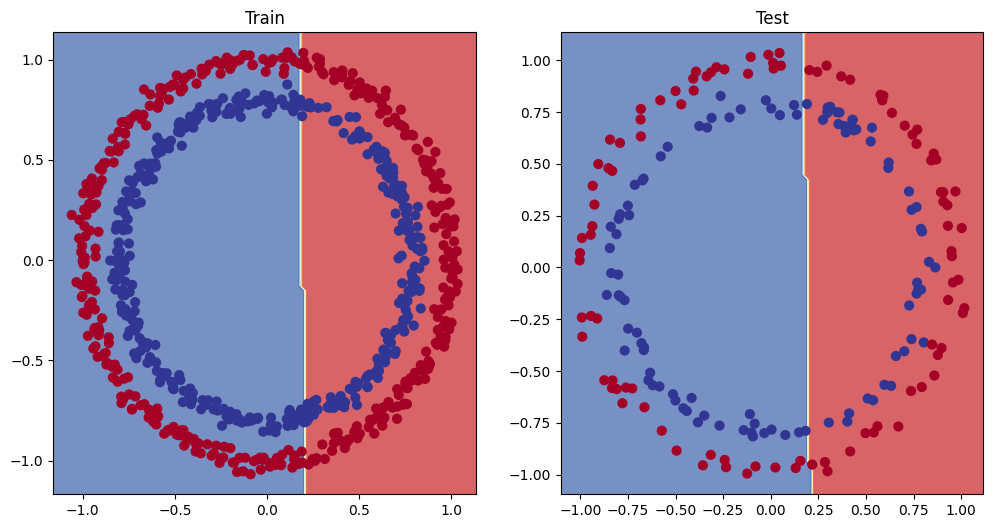

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_1, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_1, x_test, y_test)

# Non-LinearModel

## Recreating data

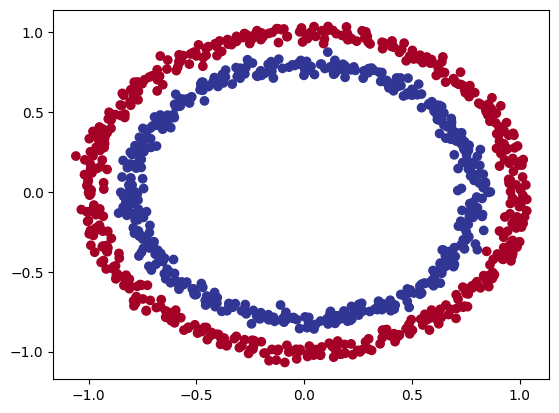

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
import torch
from sklearn.model_selection import train_test_split

x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

x_train, x_test, y_train ,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [ ]:
from torch import nn
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=10)
    self.layer3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))
model_2 = CircleModel().to(device)
model_2

CircleModel(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_2.parameters(),
                            lr=0.1)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

In [ ]:
epochs = 2000
for epoch in range(epochs):
  model_2.train()

  y_logits = model_2(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_logits = model_2(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch % 100 == 0:
    print(f'Epoch:{epoch} | Loss: {loss:.4f}, Acc: {acc:.3f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.3f}%')

Epoch:0 | Loss: 0.6929, Acc: 50.000% | Test Loss: 0.6932, Test Acc: 50.000%
Epoch:100 | Loss: 0.6912, Acc: 52.875% | Test Loss: 0.6910, Test Acc: 52.500%
Epoch:200 | Loss: 0.6898, Acc: 53.375% | Test Loss: 0.6894, Test Acc: 55.000%
Epoch:300 | Loss: 0.6879, Acc: 53.000% | Test Loss: 0.6872, Test Acc: 56.000%
Epoch:400 | Loss: 0.6852, Acc: 52.750% | Test Loss: 0.6841, Test Acc: 56.500%
Epoch:500 | Loss: 0.6810, Acc: 52.750% | Test Loss: 0.6794, Test Acc: 56.500%
Epoch:600 | Loss: 0.6751, Acc: 54.500% | Test Loss: 0.6729, Test Acc: 56.000%
Epoch:700 | Loss: 0.6666, Acc: 58.375% | Test Loss: 0.6632, Test Acc: 59.000%
Epoch:800 | Loss: 0.6516, Acc: 64.000% | Test Loss: 0.6476, Test Acc: 67.500%
Epoch:900 | Loss: 0.6236, Acc: 74.000% | Test Loss: 0.6215, Test Acc: 79.000%
Epoch:1000 | Loss: 0.5682, Acc: 87.750% | Test Loss: 0.5738, Test Acc: 86.500%
Epoch:1100 | Loss: 0.4815, Acc: 93.500% | Test Loss: 0.4993, Test Acc: 90.500%
Epoch:1200 | Loss: 0.3706, Acc: 97.750% | Test Loss: 0.4059, Tes

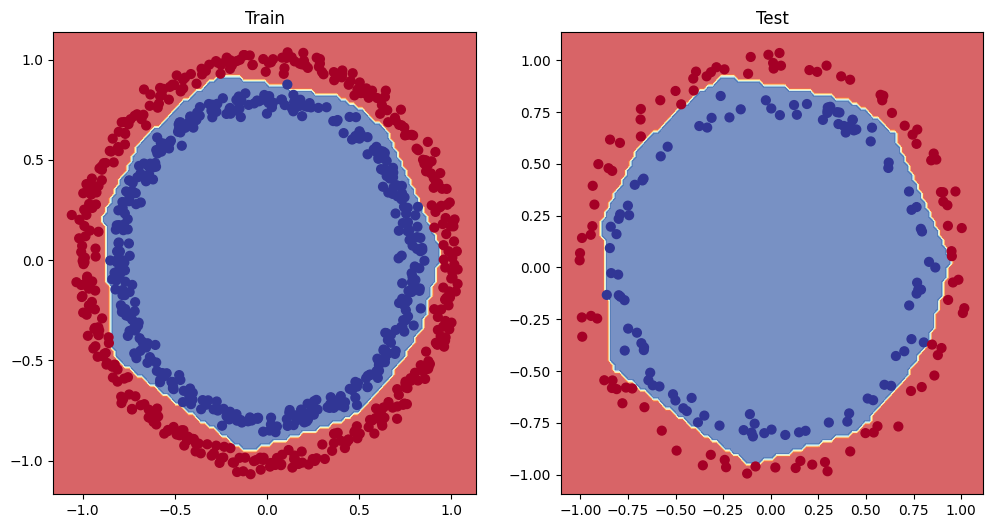

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_2, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_2, x_test, y_test)

# Multi-class classification

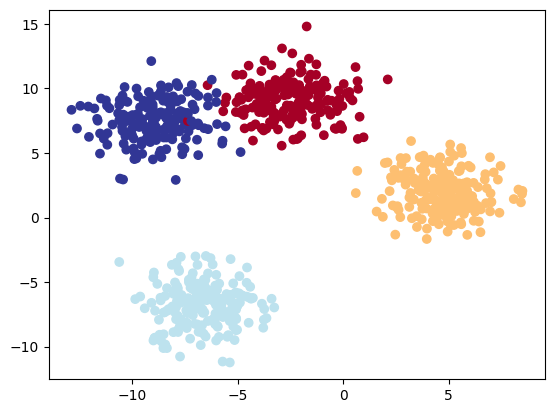

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

x_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=2,
                            centers = 4,
                            cluster_std=1.5,
                            random_state=42)

x_blob = torch.from_numpy(x_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

x_train, x_test, y_train, y_test = train_test_split(x_blob, y_blob,
                                                    test_size=0.2,
                                                    random_state=42)

plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=plt.cm.RdYlBu)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
class BlobModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Sequential(
        nn.Linear(in_features=2, out_features=8),
        nn.ReLU(),
        nn.Linear(in_features=8, out_features=8),
        nn.ReLU(),
        nn.Linear(in_features=8, out_features=4)
    )

  def forward(self, x):
    return self.layer(x)

model_3 = BlobModel().to(device)
model_3

BlobModel(
  (layer): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_3.train()
  y_logits = model_3(x_train)
  y_pred = torch.argmax(torch.softmax(y_logits, dim=1),dim=1)

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train, y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    y_test_logits = model_3(x_test)
    y_test_pred = torch.argmax(torch.softmax(y_test_logits, dim=1),dim=1)

    test_loss = loss_fn(y_test_logits, y_test)
    test_acc = accuracy_fn(y_test, y_test_pred)

  if epoch % 10 == 0:
    print(f'Epoch: {epoch}, Train Loss:{loss:.4f}, Train Acc:{acc:.3f}% | Test Loss:{test_loss:.4f}, Test Acc:{test_acc:.3f}%')

Epoch: 0, Train Loss:1.0902, Train Acc:70.500% | Test Loss:0.9338, Test Acc:77.000%
Epoch: 10, Train Loss:0.6198, Train Acc:72.875% | Test Loss:0.5200, Test Acc:79.500%
Epoch: 20, Train Loss:0.4797, Train Acc:73.125% | Test Loss:0.3978, Test Acc:79.000%
Epoch: 30, Train Loss:0.3941, Train Acc:81.875% | Test Loss:0.3248, Test Acc:85.500%
Epoch: 40, Train Loss:0.3256, Train Acc:90.125% | Test Loss:0.2673, Test Acc:90.000%
Epoch: 50, Train Loss:0.2435, Train Acc:95.875% | Test Loss:0.1964, Test Acc:99.000%
Epoch: 60, Train Loss:0.1456, Train Acc:98.500% | Test Loss:0.1161, Test Acc:99.000%
Epoch: 70, Train Loss:0.0888, Train Acc:98.875% | Test Loss:0.0712, Test Acc:99.000%
Epoch: 80, Train Loss:0.0647, Train Acc:98.875% | Test Loss:0.0519, Test Acc:99.000%
Epoch: 90, Train Loss:0.0531, Train Acc:98.875% | Test Loss:0.0425, Test Acc:99.000%


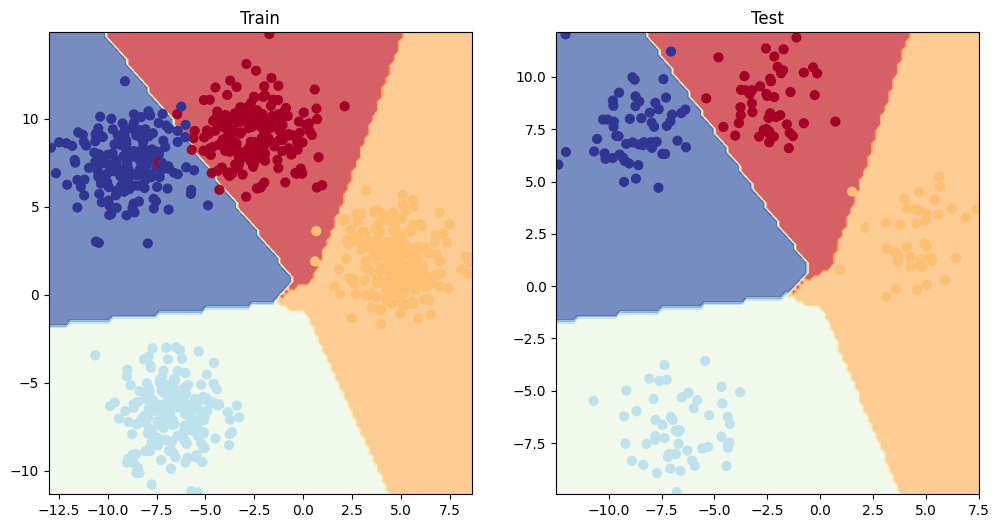

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_3, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_3, x_test, y_test)